In [220]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from sklearn.datasets import load_iris
from sklearn import datasets

import cx_Oracle

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

In [3]:
# %%html
# <style>
# .output_wrapper, .output {
#     height:auto !important;
#     max-height:1000px;  /* 변경하고 싶은 크기 입력 */
# }
# .output_scroll {
#     box-shadow:none !important;
#     webkit-box-shadow:none !important;
# }
# </style>

In [4]:
## 위에 코드 -> 그래프 뽑을 때 스크롤 바 훨씬 크게 생기는 거
## (그래프 아래로 길게 이어질 때 짤리지 말라고)
## 스크롤 없어서 글자 길게 나오면 화면 깨질 수 있으니 원하는 사람만 돌리기

# 데이터 프레임

In [5]:
# 정현 _ 월 기준 상품별
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect("c##lm", "lm", 'localhost:1521/xe')
cursor =db.cursor()
cursor.execute("select * from SUM_MONTH_KIND")
x = cursor.fetchall()
SUM_MONTH_KIND = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='SUM_MONTH_KIND'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
SUM_MONTH_KIND.columns = list1

SUM_MONTH_KIND.head(3)

,제휴사,중분류코드,중분류명,구매년월,구매금액
0,A,0101,일용잡화,201401,131901760
1,A,0101,일용잡화,201402,104976960
2,A,0101,일용잡화,201403,100089050


<AxesSubplot:xlabel='제휴사', ylabel='구매금액'>

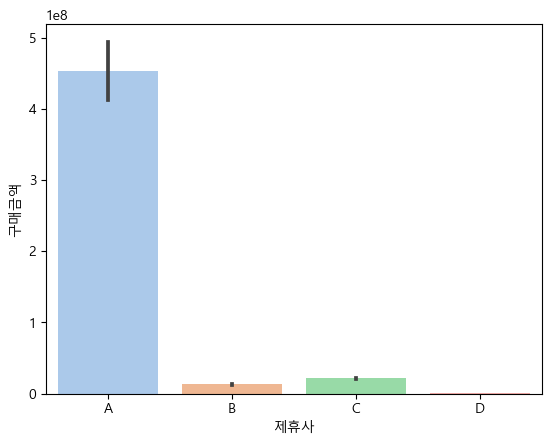

In [6]:
# 월 기준 제휴사별 구매금액(1회 구매 평균)
sns.barplot(x='제휴사', y='구매금액', data=SUM_MONTH_KIND,palette='pastel')

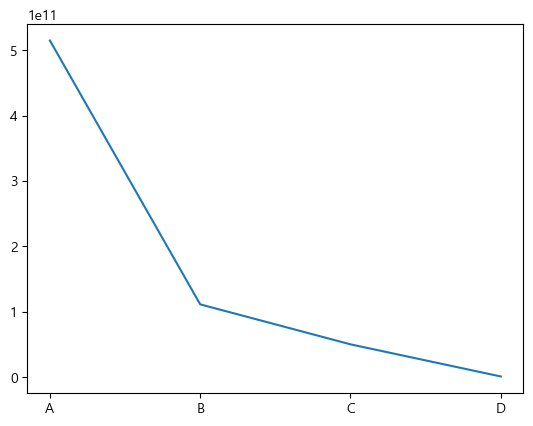

In [7]:
# 월 기준 제휴사별 구매금액(구매합)
grouped = SUM_MONTH_KIND.groupby('제휴사')['구매금액'].sum()
plt.plot(grouped)

In [8]:
# 정현 _ 월 기준 성별 기준
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect("c##lm", "lm", 'localhost:1521/xe')
cursor =db.cursor()
cursor.execute("select * from SUM_MONTH_SEX")
x = cursor.fetchall()
SUM_MONTH_SEX = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='SUM_MONTH_SEX'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
SUM_MONTH_SEX.columns = list1

SUM_MONTH_SEX.head(3)

,성별,제휴사,중분류코드,소분류코드,구매년월,구매금액
0,F,A,0101,A010101,201401,36634330
1,F,A,0101,A010101,201402,32099590
2,F,A,0101,A010101,201403,41806430


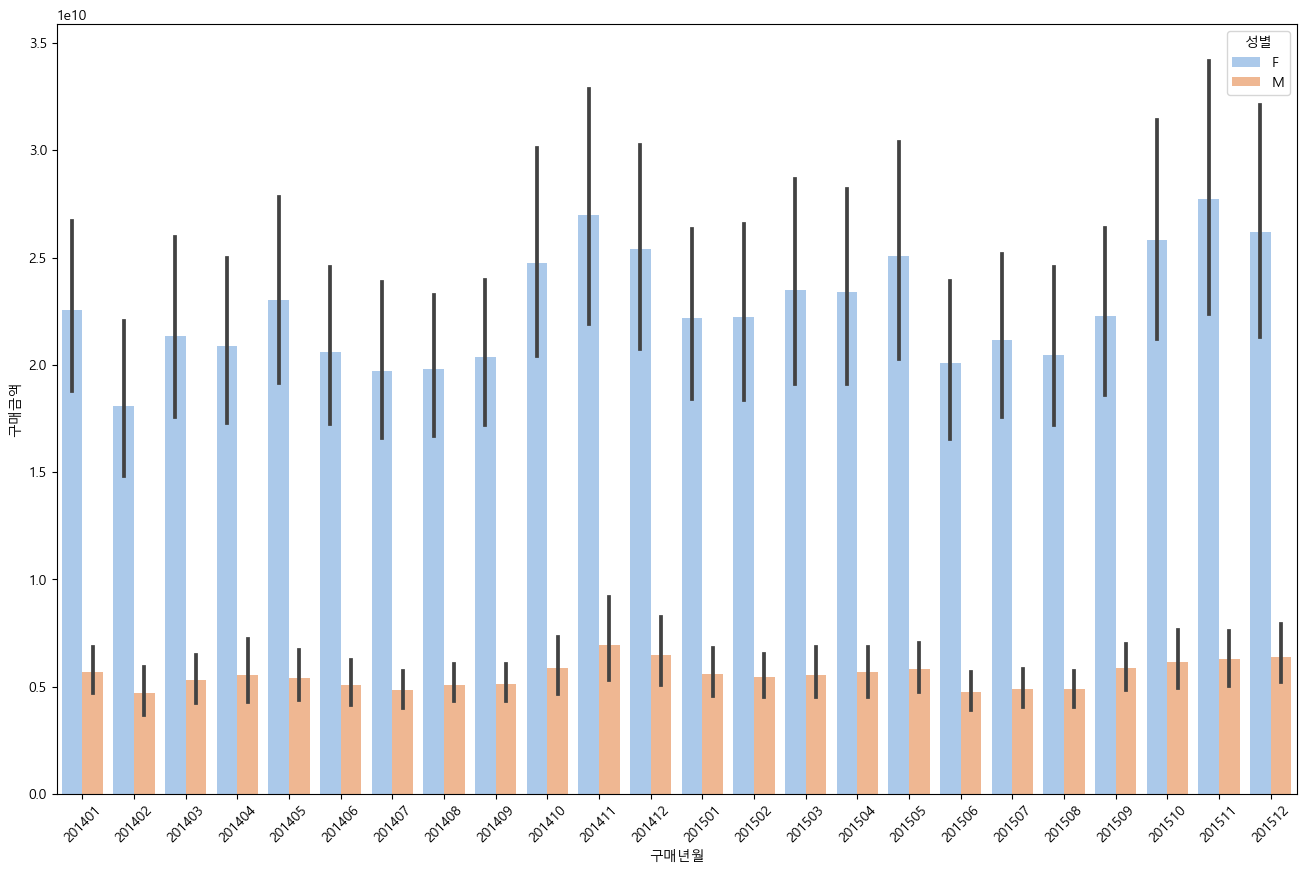

In [9]:
# 월 기준 성별 구매 총합
plt.figure(figsize=(16,10))

sns.barplot(x='구매년월', y='구매금액', hue='성별', data=SUM_MONTH_SEX, estimator=sum, palette='pastel')
plt.xticks(rotation=45)
plt.show()

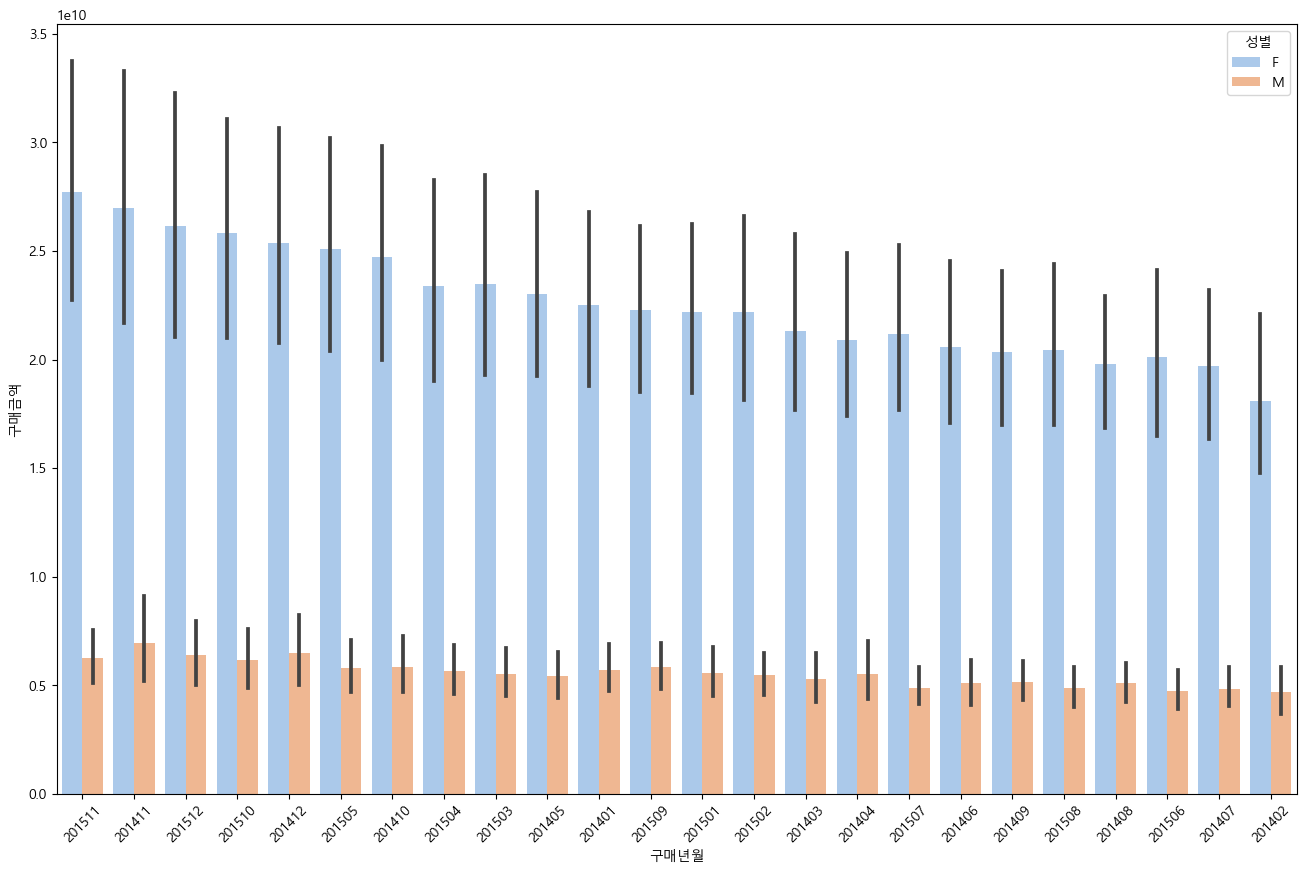

In [10]:
# -> 월 기준 성별 구매 총합 (내림차순)
plt.figure(figsize=(16,10))

order = SUM_MONTH_SEX.groupby('구매년월')['구매금액'].sum().sort_values(ascending=False).index


sns.barplot(x='구매년월', y='구매금액', hue='성별', data=SUM_MONTH_SEX, estimator=sum, palette='pastel', order = order)
plt.xticks(rotation=45)
plt.show()

In [11]:
# 서진 _ 월 기준 거주지역 기준 구매자수
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect("c##lm", "lm", 'localhost:1521/xe')
cursor =db.cursor()
cursor.execute("select * from 거주지별구매변화")
x = cursor.fetchall()
LOCATION = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='거주지별구매변화'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
LOCATION.columns = list1

LOCATION.head(3)

,거주지역,기간,구매자수
0,010,201401,8969
1,010,201402,7639
2,010,201403,9602


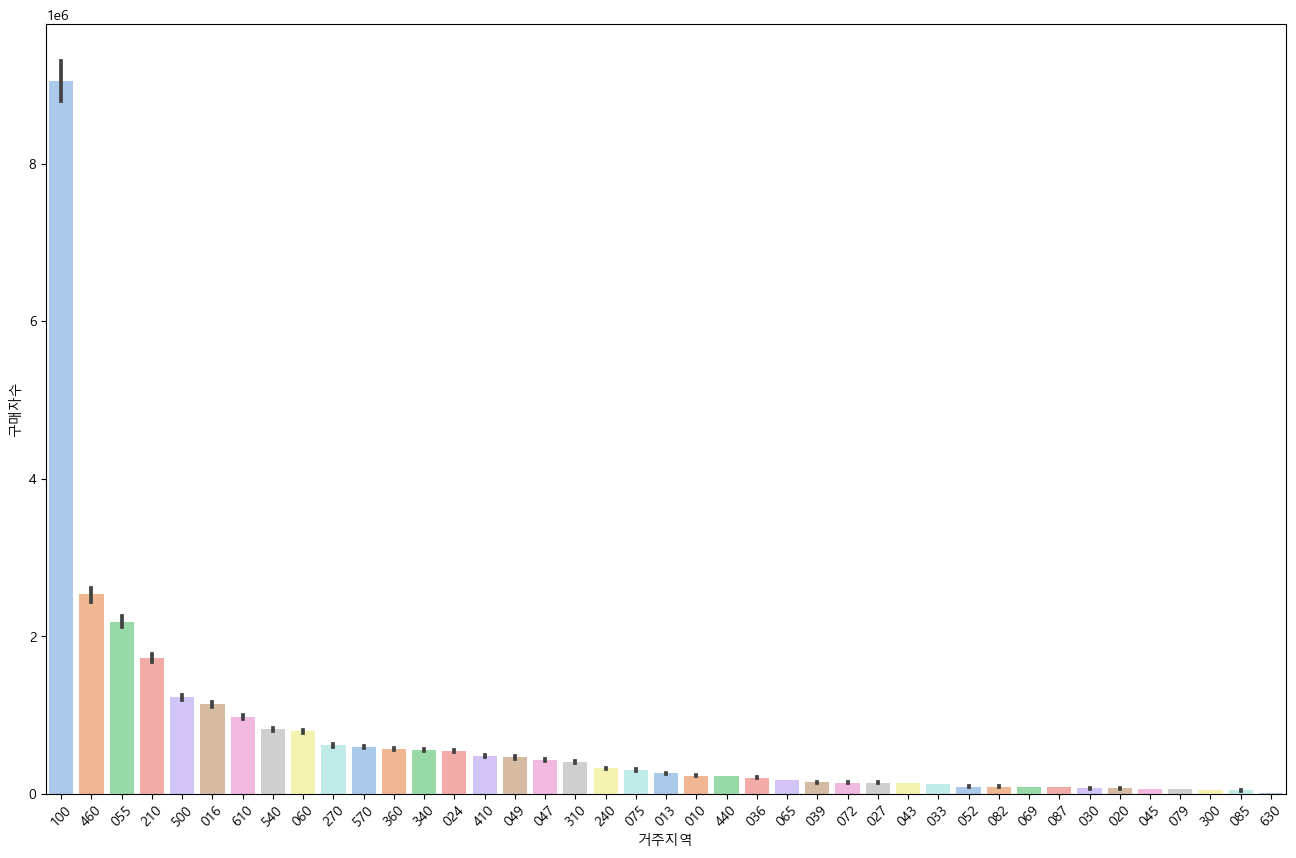

In [12]:
# 거주지별 구매자 수 - 내림차순
plt.figure(figsize=(16,10))

order = LOCATION.groupby('거주지역')['구매자수'].sum().sort_values(ascending=False).index # 내림차순

sns.barplot(x='거주지역', y='구매자수', data=LOCATION, estimator=sum, palette='pastel',order=order)
plt.xticks(rotation=45)
plt.show()

In [14]:
# 승주 _ 연령대별
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect("c##lm", "lm", 'localhost:1521/xe')
cursor =db.cursor()
cursor.execute("select * from BY_AGE")
x = cursor.fetchall()
BY_AGE = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='BY_AGE'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
BY_AGE.columns = list1

BY_AGE.head(3)

,연령대,제휴사,구매금액
0,19세이하,A,42103090
1,19세이하,B,59056730
2,19세이하,C,31695167


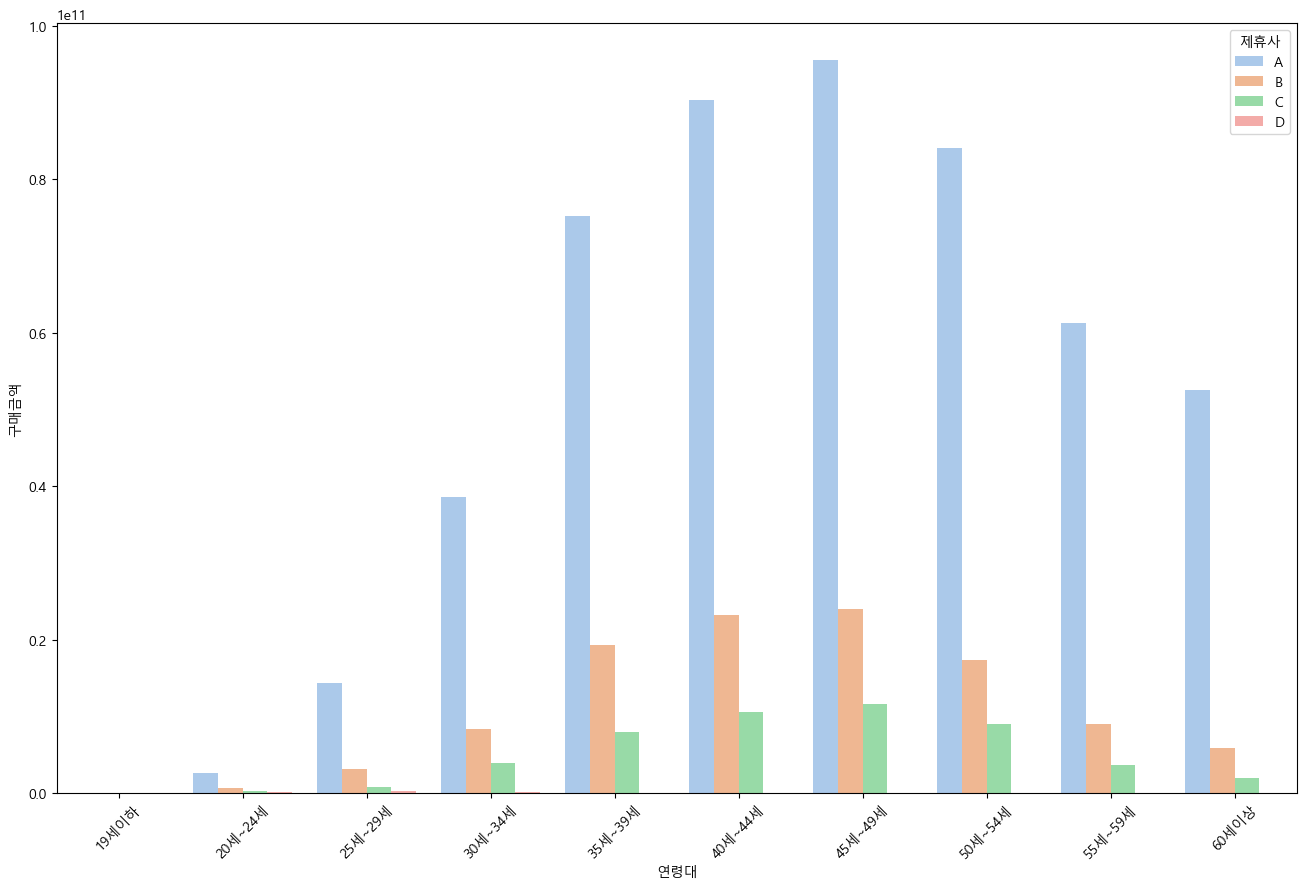

In [15]:
# 월 기준 연령대별 구매 총합 -> 기간별 탐색 필요
plt.figure(figsize=(16,10))


sns.barplot(x='연령대', y='구매금액',hue='제휴사', data=BY_AGE, estimator=sum, palette='pastel')
plt.xticks(rotation=45)


plt.show()

### 임의코드 분류별 구매금액

In [2]:
df = pd.read_excel(r"C:\Users\h\hmkd1\HMKD 프로젝트\onetool1_추가.xlsx")
df['임의코드'] = df['임의코드'].fillna('-')
df.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역
0,A,4.0,402.0,A040224,캐주얼,global SPA,A6,의류,2938323.0,17129.0,4.0,20141018.0,17.0,53320700.0,F,25세~29세,460.0
1,A,4.0,409.0,A040902,디자이너,디자이너부틱,A5,명품,3203575.0,8994.0,25.0,20141128.0,19.0,38442200.0,F,35세~39세,460.0
2,A,2.0,203.0,A020302,화장품,기초 화장품,A8,화장품,2144999.0,8079.0,26.0,20140614.0,13.0,30690000.0,M,35세~39세,100.0
3,A,2.0,206.0,A020601,피혁잡화,네셔널,A5,명품,2826279.0,8079.0,26.0,20141001.0,15.0,22118400.0,M,35세~39세,100.0
4,A,5.0,506.0,A050601,남성 트랜디,트랜디,A6,의류,1450465.0,7862.0,17.0,20140227.0,18.0,21640300.0,F,35세~39세,100.0


In [3]:
af = df[['제휴사','대분류코드','중분류코드','소분류코드','임의코드','임의코드분류명','중분류명','소분류명','구매금액']]
af.head()

,제휴사,대분류코드,중분류코드,소분류코드,임의코드,임의코드분류명,중분류명,소분류명,구매금액
0,A,4.0,402.0,A040224,A6,의류,캐주얼,global SPA,53320700.0
1,A,4.0,409.0,A040902,A5,명품,디자이너,디자이너부틱,38442200.0
2,A,2.0,203.0,A020302,A8,화장품,화장품,기초 화장품,30690000.0
3,A,2.0,206.0,A020601,A5,명품,피혁잡화,네셔널,22118400.0
4,A,5.0,506.0,A050601,A6,의류,남성 트랜디,트랜디,21640300.0


In [4]:
af.groupby('임의코드분류명').agg({'구매금액':'sum'})
agr = af[af.제휴사=='A'].groupby(['제휴사','임의코드분류명']).agg({'구매금액':'sum'})
bgr = af[af.제휴사=='B'].groupby(['제휴사','임의코드분류명']).agg({'구매금액':'sum'})
cgr = af[af.제휴사=='C'].groupby(['제휴사','임의코드분류명']).agg({'구매금액':'sum'})
dgr = af[af.제휴사=='D'].groupby(['제휴사','임의코드분류명']).agg({'구매금액':'sum'})
agr

구매금액
제휴사 임의코드분류명              
A   가구       1.775337e+08
    기타       1.375732e+08
    명품       1.021327e+09
    문구/생활용품  1.833160e+08
    스포츠      4.636292e+08
    식품       5.913577e+08
    유아       1.647614e+08
    음료/주류    4.417083e+07
    의류       1.602384e+09
    전자/기기    2.773601e+08
    패션잡화     1.906144e+08
    화장품      3.588941e+08

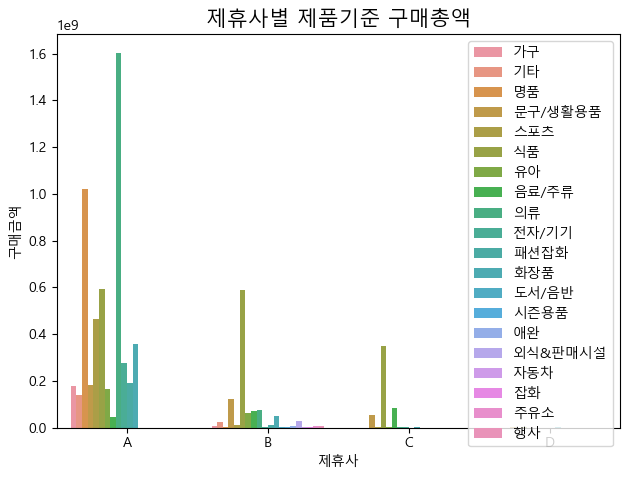

In [5]:
# 제휴사별 제품기준 구매총액 (한 그래프에 보기)
gr = af.groupby(['제휴사', '임의코드분류명']).agg({'구매금액': 'sum'}).reset_index()
ax = sns.barplot(data=gr, x='제휴사', y='구매금액', hue='임의코드분류명')

ax.legend(loc='upper right')
plt.tight_layout()
ax.set_title('제휴사별 제품기준 구매총액', size=15)
plt.show()

Text(0.5, 1.0, 'D사 제품별 구매 총액')

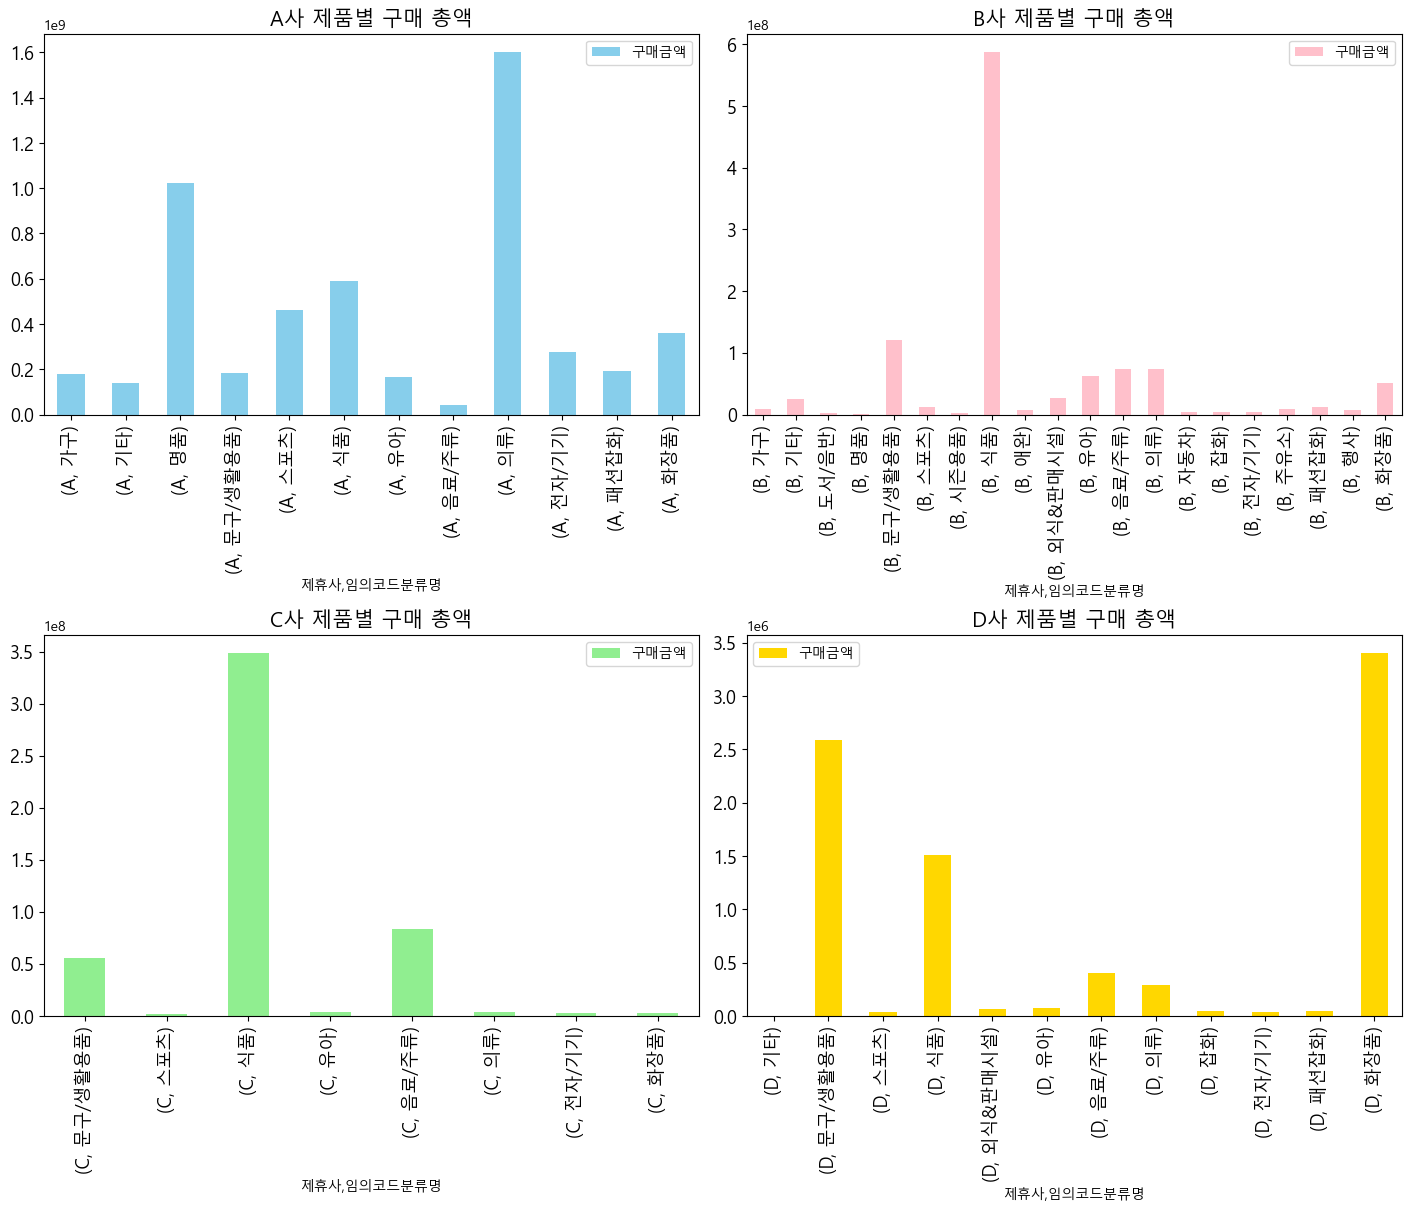

In [6]:
# 제휴사별 제품기준(임의코드) 구매총액
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,12), constrained_layout=True)

agr.plot(kind='bar', color='skyblue', ax=ax[0,0], fontsize=13)
bgr.plot(kind='bar', color='pink', ax=ax[0,1], fontsize=13)
cgr.plot(kind='bar', color='lightgreen', ax=ax[1,0], fontsize=13)
dgr.plot(kind='bar', color='gold', ax=ax[1,1], fontsize=13)

ax[0,0].set_title('A사 제품별 구매 총액', size=15)
ax[0,1].set_title('B사 제품별 구매 총액', size=15)
ax[1,0].set_title('C사 제품별 구매 총액', size=15)
ax[1,1].set_title('D사 제품별 구매 총액', size=15)

### 임의코드별 성별 총구매금액 / 평균 구매액

Text(0.5, 1.0, '성별 상품구매 평균액')

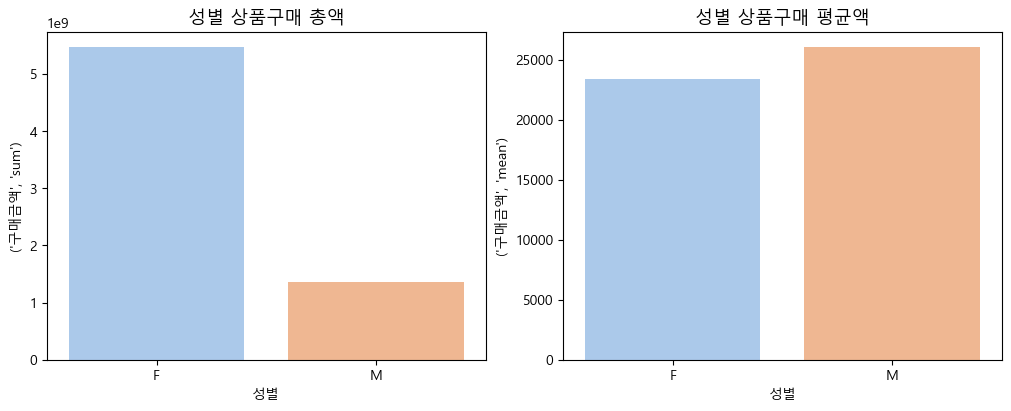

In [7]:
### 남녀 구매총액, 평균액 비교
fig, ax = plt.subplots(ncols=2, figsize=(10,4), constrained_layout=True)
s_gr = df.groupby('성별').agg({'구매금액':['sum','mean']}).reset_index()
sns.barplot(data=s_gr, x='성별', y=('구매금액','sum'), ax=ax[0], palette='pastel')
sns.barplot(data=s_gr, x='성별', y=('구매금액','mean'), ax=ax[1], palette='pastel')
ax[0].set_title('성별 상품구매 총액', size=13)
ax[1].set_title('성별 상품구매 평균액', size=13)

- 성별 상품 구매 총액은 여성이 압도적으로 높음(약 3배)
- 다만 구매 평균액은 감성이 조금 더 높은 편

In [8]:
agr = df[df.제휴사=='A'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean','count']}).reset_index()
bgr = df[df.제휴사=='B'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean','count']}).reset_index()
cgr = df[df.제휴사=='C'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean','count']}).reset_index()
dgr = df[df.제휴사=='D'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean','count']}).reset_index()

In [9]:
dgr

임의코드분류명 성별       구매금액                    
                      sum          mean count
0   문구/생활용품  F  2069280.0   8996.869565   230
1   문구/생활용품  M   518470.0  11031.276596    47
2       스포츠  F    35000.0  35000.000000     1
3        식품  F  1204750.0   5378.348214   224
4        식품  M   303370.0   4099.594595    74
5   외식&판매시설  F    63250.0   7027.777778     9
6        유아  F    43000.0  43000.000000     1
7        유아  M    29400.0  29400.000000     1
8     음료/주류  F   250200.0   1867.164179   134
9     음료/주류  M   154080.0   1902.222222    81
10       의류  F   139660.0   9310.666667    15
11       의류  M   150840.0  30168.000000     5
12       잡화  F    28000.0   9333.333333     3
13       잡화  M    21700.0  10850.000000     2
14    전자/기기  F    37800.0  12600.000000     3
15     패션잡화  F    49000.0  24500.000000     2
16      화장품  F  2754820.0  18365.466667   150
17      화장품  M   645700.0  17451.351351    37

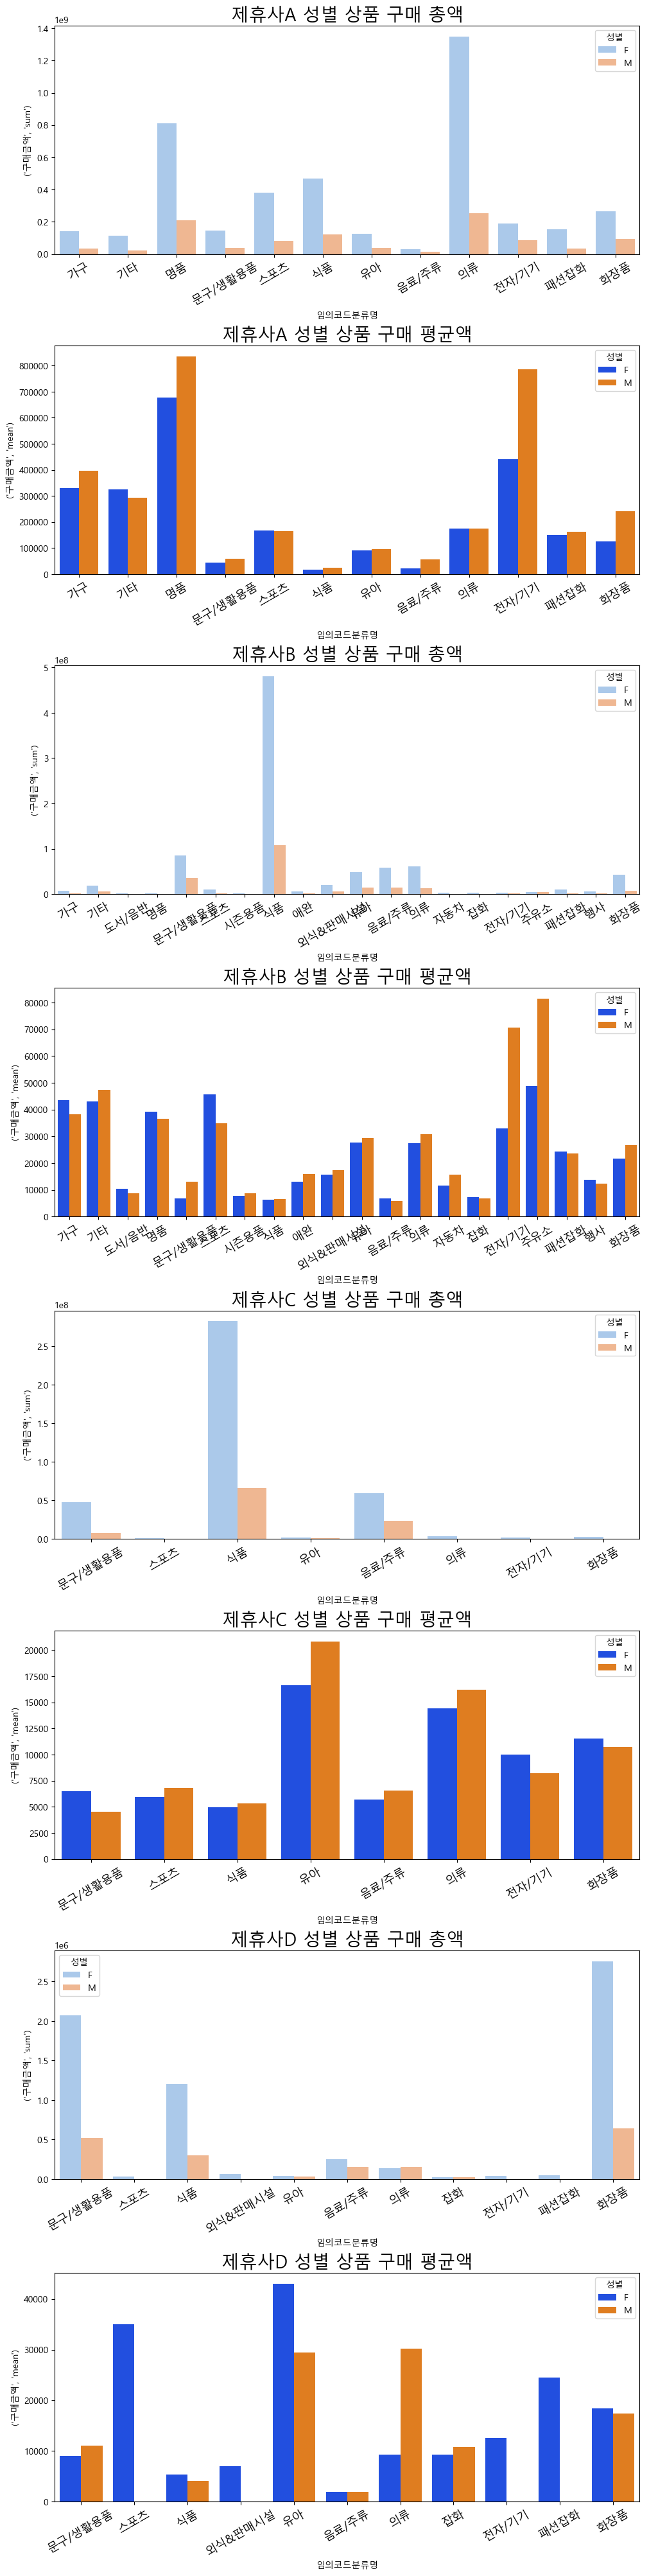

In [10]:
# 제휴사A 성별 상품 구매 총액/평균액
fig, ax = plt.subplots(nrows=8, figsize=(10,40), constrained_layout=True)
#####################################################################
sns.barplot(data=agr, x='임의코드분류명', y=('구매금액','sum'), hue='성별', ax=ax[0], palette='pastel')
sns.barplot(data=agr, x='임의코드분류명', y=('구매금액','mean'), hue='성별', ax=ax[1], palette='bright')

ax[0].set_title('제휴사A 성별 상품 구매 총액', size=20)   #제목 설정
ax[1].set_title('제휴사A 성별 상품 구매 평균액', size=20)
#####################################################################
sns.barplot(data=bgr, x='임의코드분류명', y=('구매금액','sum'), hue='성별', ax=ax[2], palette='pastel')
sns.barplot(data=bgr, x='임의코드분류명', y=('구매금액','mean'), hue='성별', ax=ax[3], palette='bright')

ax[2].set_title('제휴사B 성별 상품 구매 총액', size=20)   #제목 설정
ax[3].set_title('제휴사B 성별 상품 구매 평균액', size=20)
#####################################################################
sns.barplot(data=cgr, x='임의코드분류명', y=('구매금액','sum'), hue='성별', ax=ax[4], palette='pastel')
sns.barplot(data=cgr, x='임의코드분류명', y=('구매금액','mean'), hue='성별', ax=ax[5], palette='bright')

ax[4].set_title('제휴사C 성별 상품 구매 총액', size=20)   #제목 설정
ax[5].set_title('제휴사C 성별 상품 구매 평균액', size=20)
#####################################################################
sns.barplot(data=dgr, x='임의코드분류명', y=('구매금액','sum'), hue='성별', ax=ax[6], palette='pastel')
sns.barplot(data=dgr, x='임의코드분류명', y=('구매금액','mean'), hue='성별', ax=ax[7], palette='bright')

ax[6].set_title('제휴사D 성별 상품 구매 총액', size=20)   #제목 설정
ax[7].set_title('제휴사D 성별 상품 구매 평균액', size=20)
#####################################################################
from matplotlib import rc; rc('font', family='Malgun Gothic')  #한글 깨짐 방지
for i in range(8):
    ax[i].tick_params(axis='x', labelsize=13, labelrotation=30)   # x축 폰트 설정
plt.show()


### <A사> 롯데백화점
의류 >>> 명품 >> 식품>스포츠>화장품 순으로 높음

- 모든 칼럼에서 구매 총액은 여성이 더 높음 (차이가 매우 큰 편)

- 개중 가구, 명품, 음료/주류, 전자기기, 화장품에서 남성의 평균 구매액이 눈에 띄게 큰 편
- 그 외 칼럼의 남녀 평균 구매액은 비슷한 편 (여성이 압도적으로 높은 경우x)

- 타 제휴사의 화장품 평균 판매액의 경우 남녀의 차이가 크지 않은데, 롯데백화점만 눈에 띄게 큼

=====================================

### <B사> 롯데마트
식품 >>>>> 문구생활용품 > 음료주류 > 의류 > 유아 > 화장품

- 마찬가지로 모든 칼럼에서 구매 총액은 여성이 더 높음 (차이가 매우 큰 편)

- 전자/기기와 주유소에서 남성 평균 구매액이 월등히 높고, 그 외 칼럼들은 비슷한 편
- 문구생활용품에서 구매 총액이 여성이 훨씬 큰 것에 비해, 평균액이 남성이 훨씬 많음 (금액 자체는 작지만, 비율적으로 차이가 많이 남)
- 스포츠에서 남성대비 여성 평균 구매액이 높은 편

- 명품은 데이터가 너무 소수라 의미x

=====================================

### <C사> 롯데슈퍼
 식품 >>>>> 음료주류 > 문구생활용품

- 타 제휴사들과 비슷. 총액은 여성이 더 높음

- 유아, 의류 등에서 남성이 더 높은 평균구매액
- 유아, 의류, 전자/기기, 화장품 등은 총구매액은 거의 바닥인데, 평균 구매액이 높은 편 (한 번 살 때 고가로 구매)

=====================================

### <D사> 롭스
화장품 >> 문구생활용품 > 식품 >>> 음료주류 > 의류

- 타 제휴사들과 비슷. 총액은 여성이 더 높음

- 화장품 가게이니만큼 화장품 매출이 가장 높고, 문구와 식품류도 매출의 상당부분을 차지

- 스포츠/ 외식&판매시설/ 유아/ 의류/ 잡화/ 전자기기/ 패션잡화 등은 데이터가 너무 소수라 의미x

#### - Q. VIP고객(구매액이 높은)이 선호하는 상품
+해당 고객이 제휴사를 몇 번이나 이용했는지, 모바일/app인지 온라인몰인지(? 오프라인매장은 어디에 속하나?)
<br> =>> select distinct 제휴사 from channel order by 제휴사;
- A_MOBILE/APP
- B_MOBILE/APP
- B_ONLINEMALL
- C_MOBILE/APP
- C_ONLINEMALL
- D_MOBILE/APP

#### - Q. 모든 상품들 중 가장 잘 팔린 상품/ 가장 높은 매출을 기록한 상품
- 각 임의코드 내에서 가장 많이 팔린/ 높은 매출을 기록한 상품 뽑기
- 전체에서도 뽑기
- 해당 상품들이 언제 잘 팔렸는지, 혹시 갑자기 매출이 폭증하거나 하지는 않았는지

### 월 기준으로 각 상품별(임의코드) 매출 추이 보기

In [11]:
imisdf = df[df.구매금액.notnull()]
imisdf.head(3)

# 15년도 1분기: 메르스, 황사
# 14년 세월호 -> 인사이트 거의 없는 듯 (외식 등 한번 살펴보기)

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역
0,A,4.0,402.0,A040224,캐주얼,global SPA,A6,의류,2938323.0,17129.0,4.0,20141018.0,17.0,53320700.0,F,25세~29세,460.0
1,A,4.0,409.0,A040902,디자이너,디자이너부틱,A5,명품,3203575.0,8994.0,25.0,20141128.0,19.0,38442200.0,F,35세~39세,460.0
2,A,2.0,203.0,A020302,화장품,기초 화장품,A8,화장품,2144999.0,8079.0,26.0,20140614.0,13.0,30690000.0,M,35세~39세,100.0


### 임의코드별 연령대별 총구매금액 / 평균 구매액 (아직 안함)

In [12]:
agr = df[df.제휴사=='A'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean']}).reset_index()
bgr = df[df.제휴사=='B'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean']}).reset_index()
cgr = df[df.제휴사=='C'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean']}).reset_index()
dgr = df[df.제휴사=='D'].groupby(['임의코드분류명','성별']).agg({'구매금액':['sum','mean']}).reset_index()

In [13]:
df.head()
df.연령대.value_counts()

45세~49세    64790
40세~44세    58733
50세~54세    44591
35세~39세    43262
55세~59세    24009
30세~34세    23070
60세이상      16896
25세~29세     7450
20세~24세     2497
19세이하        219
Name: 연령대, dtype: int64

In [14]:
df.head(3)
# 영수증번호 겹치는거 있는지 확인 -> 1개 구매금액인지 여부 -> 겹침
# 지역코드 -> 2014, 2015년 해당 지역 코드 찾아보기
# 채널-제휴사(3개월 데이터만 있음) -> 해당 사의 모바일 채널(핸드폰)과 온라인 몰(pc)을 이용한 횟수
# 점포코드-거주지와 연결하기

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역
0,A,4.0,402.0,A040224,캐주얼,global SPA,A6,의류,2938323.0,17129.0,4.0,20141018.0,17.0,53320700.0,F,25세~29세,460.0
1,A,4.0,409.0,A040902,디자이너,디자이너부틱,A5,명품,3203575.0,8994.0,25.0,20141128.0,19.0,38442200.0,F,35세~39세,460.0
2,A,2.0,203.0,A020302,화장품,기초 화장품,A8,화장품,2144999.0,8079.0,26.0,20140614.0,13.0,30690000.0,M,35세~39세,100.0


In [15]:
df.영수증번호.value_counts()

10089925.0    5
7571434.0     4
10389075.0    4
6265608.0     4
9969694.0     4
             ..
7894097.0     1
8808737.0     1
8675151.0     1
10023132.0    1
242821.0      1
Name: 영수증번호, Length: 278341, dtype: int64

### 상품등급 추가

In [16]:
import qgrid
qdf = qgrid.show_grid(df, show_toolbar=True)

qdf

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286388 entries, 0 to 286387
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   제휴사      286236 non-null  object 
 1   대분류코드    286236 non-null  float64
 2   중분류코드    286236 non-null  float64
 3   소분류코드    286236 non-null  object 
 4   중분류명     286236 non-null  object 
 5   소분류명     286236 non-null  object 
 6   임의코드     286388 non-null  object 
 7   임의코드분류명  286236 non-null  object 
 8   영수증번호    285368 non-null  float64
 9   고객번호     285517 non-null  float64
 10  점포코드     285368 non-null  float64
 11  구매일자     285368 non-null  float64
 12  구매시간     285368 non-null  float64
 13  구매금액     285368 non-null  float64
 14  성별       285517 non-null  object 
 15  연령대      285517 non-null  object 
 16  거주지역     283441 non-null  float64
dtypes: float64(9), object(8)
memory usage: 37.1+ MB


In [18]:
axk = df[['제휴사','소분류명','구매금액']].sort_values(['제휴사','소분류명'])

#소분류명 별 평균 금액
axk = axk.dropna()
axk = axk.groupby(['제휴사','소분류명']).agg({'구매금액':'mean'}).reset_index()
axk

,제휴사,소분류명,구매금액
0,A,14K,182815.135135
1,A,4대 B/D,326859.651163
2,A,ACC Bloom (3F),61429.000000
3,A,ANDZ,39000.000000
4,A,BON,222500.000000
...,...,...,...
3250,D,헤어세팅기,12600.000000
3251,D,헤어스프레이,3425.000000
3252,D,헤어에센스,8133.333333
3253,D,헤어왁스,4000.000000


In [19]:
qqq = qgrid.show_grid(axk, show_toolbar=True)
qqq    #소분류명별 평균 구매금액

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [24]:
axk['상품등급'] = '중가'   #아래에서 고가, 저가 수정할 것

In [25]:
# upper 이상치 -> 고가상품
def qdes(axk, com):
    xk = axk[axk.제휴사==com]
    v25 = axk.구매금액.describe().loc['25%']
    v75 = axk.구매금액.describe().loc['75%']
    iqr = (v75-v25)*1.5
    return v75+iqr

for i in ['A','B','C','D']:
    high = qdes(axk, i)
    idx = (axk.제휴사==i) & (axk.구매금액>high)
    axk.상품등급[idx]='고가'

In [27]:
# 55%미만 -> 저가 상품
v55 = np.percentile(axk.구매금액, 55)
axk.상품등급[axk.구매금액<v55]='저가'

In [28]:
# 고가/중가/저가 상품 비율 확인
axk.상품등급.value_counts()

저가    1790
중가     957
고가     508
Name: 상품등급, dtype: int64

In [29]:
qqq = qgrid.show_grid(axk, show_toolbar=True)
qqq    #소분류명별 평균 구매금액

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [30]:
df.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역
0,A,4.0,402.0,A040224,캐주얼,global SPA,A6,의류,2938323.0,17129.0,4.0,20141018.0,17.0,53320700.0,F,25세~29세,460.0
1,A,4.0,409.0,A040902,디자이너,디자이너부틱,A5,명품,3203575.0,8994.0,25.0,20141128.0,19.0,38442200.0,F,35세~39세,460.0
2,A,2.0,203.0,A020302,화장품,기초 화장품,A8,화장품,2144999.0,8079.0,26.0,20140614.0,13.0,30690000.0,M,35세~39세,100.0
3,A,2.0,206.0,A020601,피혁잡화,네셔널,A5,명품,2826279.0,8079.0,26.0,20141001.0,15.0,22118400.0,M,35세~39세,100.0
4,A,5.0,506.0,A050601,남성 트랜디,트랜디,A6,의류,1450465.0,7862.0,17.0,20140227.0,18.0,21640300.0,F,35세~39세,100.0


In [33]:
# df에 상품등급 칼럼(고가/중가/저가) 추가 전 확인
merged = pd.merge(df, axk[['제휴사','소분류명','상품등급']], on=['제휴사','소분류명'], how='left')
merged.head(3)
merged.상품등급.value_counts()

저가    209085
중가     50230
고가     26120
Name: 상품등급, dtype: int64

In [34]:
# 상품등급 칼럼 추가
df['상품등급'] = merged.상품등급

In [35]:
df.to_csv(r'./onetool2_2.xlsx')

### 상품등급별 분석

In [157]:
df = pd.read_excel(r'C:\Users\h\hmkd1\HMKD 프로젝트\onetool2_2_중분류명+제휴사.xlsx')
df.head(3)

,Unnamed: 0,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,상품등급
0,0,A,4.0,402.0,A040224,A캐주얼,global SPA,A06,A의류,2938323.0,17129.0,4.0,20141018.0,17.0,53320700.0,F,25세~29세,460.0,고가
1,1,A,4.0,409.0,A040902,A디자이너,디자이너부틱,A05,A명품,3203575.0,8994.0,25.0,20141128.0,19.0,38442200.0,F,35세~39세,460.0,고가
2,2,A,2.0,203.0,A020302,A화장품,기초 화장품,A08,A화장품,2144999.0,8079.0,26.0,20140614.0,13.0,30690000.0,M,35세~39세,100.0,고가


In [57]:
prmi = df[df.상품등급=='고가']
prmi.소분류명.unique()

array(['global SPA', '디자이너부틱', '기초 화장품', '네셔널', '트랜디', '수입화', '국산A/V',
       '명품시계기타', '명품잡화', '비지니스군', '명품잡화보석', '피아노/악기', '영 캐릭터', '수입캐릭터',
       '캐릭터캐주얼', '굴비세트', '보석', '엘리든', '올리브핫스텁', 'N.B', '모피', '멸치세트',
       '국산냉장고.세탁기', '소품가구', '수입의류', '건강침대(흙침대)', '어덜트', '일반침대', '정육세트',
       '청과세트', '명품보석', '수삼/더덕세트', '힐앤토트', '에어컨', '곡물', '김치냉장고', '수입잡화',
       '종합가구', '가공선물세트', '엘레강스', '소파', '주류', 'L/C골프의류', '직수입 골프의류', '커리어',
       'N/B골프의류', '골프용품', '아이웨어', '컴퓨터', '남성해외패션', 'L/C 아웃도어', '가스기기',
       '일반침대(에이스)', '컨템포러리', '곶감/송이세트', '스포츠의류', '원목학생철재', '트래디셔널',
       '건과세트', '영캐주얼', '디자이너', '건강식품(홍삼)', '식탁', '영 컨템포러리', '4대 B/D',
       '유아복', '수입세탁기', '폴로상품군', 'MP3 外', '수입A/V', '영 트렌디', '토들러', '한차',
       '파리게이츠', '직수입', '수입주방', '로가디스', '명품의류기타', '명품남성', 'L.B', '에스프레소',
       '건강수면샵', '먼싱웨어', '갤럭시', '닥스', '시니어', '빈폴상품군', '피혁', '일꼬르소',
       '어반캐주얼', '남성잡화 ACC', '수입청소기 외', '인디안', '라코스테상품군', '토탈데코', '나이키골프',
       '수입소형가전', '시계', 'L/C 아동복', '헨리코튼상품군', 'N/B 아동복', '카페트', '아울렛',
    

In [82]:
imsi1 = prmi.groupby(['제휴사','임의코드분류명','소분류명']).agg({'구매금액':['sum','mean','count']}).round(0).reset_index()
imsi1 = imsi1.sort_values(['제휴사','임의코드분류명',('구매금액','sum')], ascending=[True,True,False])

imsi1.to_csv(r'C:\Users\h\hmkd1\HMKD 프로젝트\고가상품.csv')

In [79]:
imsi2 = prmi.groupby(['제휴사','임의코드분류명']).agg({'구매금액':['sum','mean','count']}).round(0).reset_index()
imsi2.sort_values(['제휴사',('구매금액','sum')], ascending=[True,False])

제휴사   임의코드분류명          구매금액                
                           sum      mean count
8    A       A의류  1.580405e+09  187407.0  8433
2    A       A명품  1.021307e+09  705810.0  1447
4    A      A스포츠  4.631524e+08  166962.0  2774
11   A      A화장품  3.579808e+08  145284.0  2464
9    A    A전자/기기  2.772872e+08  513495.0   540
10   A     A패션잡화  1.905205e+08  153522.0  1241
0    A       A가구  1.775337e+08  340103.0   522
5    A       A식품  1.621053e+08  204420.0   793
6    A       A유아  1.600690e+08  100672.0  1590
1    A       A기타  1.373480e+08  328584.0   418
3    A  A문구/생활용품  1.352508e+08   83027.0  1629
7    A    A음료/주류  4.036399e+07   79613.0   507
18   B       B식품  4.707806e+07   77304.0   609
23   B       B의류  3.076440e+07   69133.0   445
15   B  B문구/생활용품  2.116843e+07   48330.0   438
21   B       B유아  2.033816e+07   54380.0   374
13   B       B기타  1.919430e+07   84186.0   228
20   B  B외식&판매시설  1.205854e+07   71777.0   168
16   B      B스포츠  9.305100e+06   72696.0   128
26   B      B주유소  8.629212e+06   60344.0   143
27   B     B패션잡화  7.973790e+06   67574.0   118
12   B       B가구  4.347330e+06   62105.0    70
25   B    B전자/기기  3.122300e+06  148681.0    21
22   B    B음료/주류  2.281920e+06   61674.0    37
29   B      B화장품  2.026030e+06  144716.0    14
19   B       B애완  1.018450e+06   59909.0    17
28   B       B행사  7.420000e+05  106000.0     7
24   B      B자동차  6.752000e+05  135040.0     5
14   B       B명품  5.673000e+05   43638.0    13
17   B     B시즌용품  4.131200e+05   68853.0     6
33   C    C음료/주류  2.917162e+07   81713.0   357
31   C       C식품  2.231568e+07   54164.0   412
30   C  C문구/생활용품  1.493759e+07  138311.0   108
32   C       C유아  1.124230e+06   46843.0    24
34   C    C전자/기기  1.996000e+05   49900.0     4
35   D  D문구/생활용품  2.270000e+05   75667.0     3
36   D       D유아  4.300000e+04   43000.0     1

In [55]:
prmi.groupby('연령대').agg({'구매금액':['sum','mean']}).round(0)

구매금액          
                 sum      mean
연령대                           
19세이하       338890.0   33889.0
20세~24세   17048550.0  102087.0
25세~29세  188521170.0  275213.0
30세~34세  346332666.0  156712.0
35세~39세  873491733.0  228364.0
40세~44세  867954705.0  182420.0
45세~49세  916306178.0  169592.0
50세~54세  759836497.0  178659.0
55세~59세  518390161.0  191641.0
60세이상    474825792.0  226972.0

In [88]:
df.임의코드.unique()

array(['A06', 'A05', 'A08', 'A09', 'A00', 'A01', 'A13', 'A10', 'A02',
       'A03', 'A07', 'A11', '-', 'B10', 'B01', 'B02', 'B11', 'B00', 'B03',
       'B06', 'B09', 'B04', 'B08', 'B07', 'B16', 'B13', 'B12', 'B17',
       'B15', 'B19', 'B05', 'B18', 'B14', 'C10', 'C02', 'C01', 'C11',
       'C06', 'C08', 'C09', 'C03', 'D10', 'D08', 'D01', 'D06', 'D11',
       'D07', 'D04', 'D03', 'D09', 'D18', 'D02', 'D0'], dtype=object)

In [91]:
df[df.임의코드=='D0']

,Unnamed: 0,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,상품등급
286224,286224,D,6.0,606.0,D060601,D안전용품,보안용품,D0,D기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imsi1.to_csv(r'C:\Users\h\hmkd1\HMKD 프로젝트\고가상품.csv')

In [48]:
af = df.groupby('점포코드').agg({'구매금액':'sum'}).reset_index()
af.sort_values('구매금액', ascending=False)

,점포코드,구매금액
1,2.0,687537969.0
0,1.0,410852574.0
3,4.0,367473104.0
19,20.0,331809378.0
28,29.0,293276007.0
...,...,...
136,137.0,1240.0
558,582.0,990.0
560,584.0,990.0
530,551.0,660.0


In [39]:
qqq = qgrid.show_grid(df, show_toolbar=True)
qqq 

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### 각 제휴사 성별/연령대별/임의코드분류 기준 총 매출 상위10%

In [232]:
gra = pd.read_excel(r'C:\Users\h\hmkd1\HMKD 프로젝트\0529_onetool.xlsx')
gra = gra.drop('Unnamed: 0', axis=1)
gra.head(3)

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,분기,구매시간,구매금액,성별,연령대,임의연령대,거주지역,상품등급
0,A,4,402,A040224,A캐주얼,global SPA,A06,A의류,2938323,17129,4,20141018,14_04,17,53320700,F,25세~29세,20대,460.0,고가
1,A,4,409,A040902,A디자이너,디자이너부틱,A05,A명품,3203575,8994,25,20141128,14_04,19,38442200,F,35세~39세,30대,460.0,고가
2,A,2,203,A020302,A화장품,기초 화장품,A08,A화장품,2144999,8079,26,20140614,14_02,13,30690000,M,35세~39세,30대,100.0,고가


In [234]:
# 각 제휴사 성별/연령대별/임의코드분류 기준 총 매출 상위10%
for i in ['A','B','C','D']:
    xdf = gra[gra.제휴사==i]
    
    a = xdf.groupby(['제휴사','성별','임의연령대','임의코드분류명']).agg({'구매금액':['sum','mean','count']}).reset_index()
    a = a.sort_values(('구매금액','sum'), ascending=False)
    ab = a[:len(a)//10]
    
    path = 'C:\\Users\\h\\hmkd1\\HMKD 프로젝트\\top10'+i+'.xlsx'
    ab.to_excel(path)

In [203]:
# # 분기 삽입
# gra['분기']='-'
# gra.분기[(gra.구매일자>20140100) & (gra.구매일자<20140400)] = '2014_1'
# gra.분기[(gra.구매일자>20140400) & (gra.구매일자<20140700)] = '2014_2'
# gra.분기[(gra.구매일자>20140700) & (gra.구매일자<20141000)] = '2014_3'
# gra.분기[(gra.구매일자>20141000) & (gra.구매일자<20150000)] = '2014_4'
# gra.분기[(gra.구매일자>20150100) & (gra.구매일자<20150400)] = '2015_1'
# gra.분기[(gra.구매일자>20150400) & (gra.구매일자<20150700)] = '2015_2'
# gra.분기[(gra.구매일자>20150700) & (gra.구매일자<20151000)] = '2015_3'
# gra.분기[(gra.구매일자>20151000)] = '2015_4'

In [239]:
# # 성별 연령대별 임으코드분류별 총매출 상위 10%
# def imcode(company):
#     xdf = gra[gra.제휴사==company]
    
#     a = xdf.groupby(['성별','임의연령대','임의코드분류명']).agg({'구매금액':['sum','mean','count']}).reset_index()
#     a = a.sort_values(('구매금액','sum'), ascending=False)
#     ab = a[:len(a)//10]
#     return ab

In [240]:
## 그래프로 뽑으려는 정보 데이터프레임 형태로 처리
def genage(top):
    top.drop(['제휴사','Unnamed: 0'], axis=1, inplace=True)
    top.drop([0,1], inplace=True)
    top.rename(columns={'구매금액':'sum','Unnamed: 6':'mean', 'Unnamed: 7':'count'}, inplace=True)
    return top

In [241]:
## 그래프 뽑는 함수
def grap(top):
    ax = plt.figure(figsize=(8,5)).add_subplot(1,1,1)

    for i in range(0,len(top)):
        i = top.iloc[i]
        idx = (gra.성별==i.성별) & (gra.임의연령대==i.임의연령대) & (gra.임의코드분류명==i.임의코드분류명)
        gdf = gra[idx]
        gdf = gdf.groupby(['성별','임의연령대','임의코드분류명','분기']).agg({'구매금액':['sum','mean','count']}).reset_index()

        label = i['성별']+'/'+i['임의연령대']+'/'+i['임의코드분류명']
        plt.plot(gdf['분기'], gdf[('구매금액','sum')], marker='o', markersize=4, label=label)

    plt.legend()
    plt.show()

In [242]:
## 그래프 뽑는 함수(한장에 3개씩)
def grap_vi(top):
    fig, ax = plt.subplots(figsize=(8, 5))

    for k in range(0, len(top)):
        i = top.iloc[k]
        idx = (gra.성별 == i.성별) & (gra.임의연령대 == i.임의연령대) & (gra.임의코드분류명 == i.임의코드분류명)
        gdf = gra[idx]
        gdf = gdf.groupby(['성별', '임의연령대', '임의코드분류명', '분기']).agg({'구매금액': ['sum', 'mean', 'count']}).reset_index()

        label = i['성별'] + '/' + i['임의연령대'] + '/' + i['임의코드분류명']
        ax.plot(gdf['분기'], gdf[('구매금액', 'sum')], marker='o', markersize=4, label=label)

        if (k+1) % 3 == 0:    #그래프 한 그림에 3개씩만 그리기
            ax.legend()
            plt.show()
            if k != len(topa)-1:
                fig, ax = plt.subplots(figsize=(8, 5))

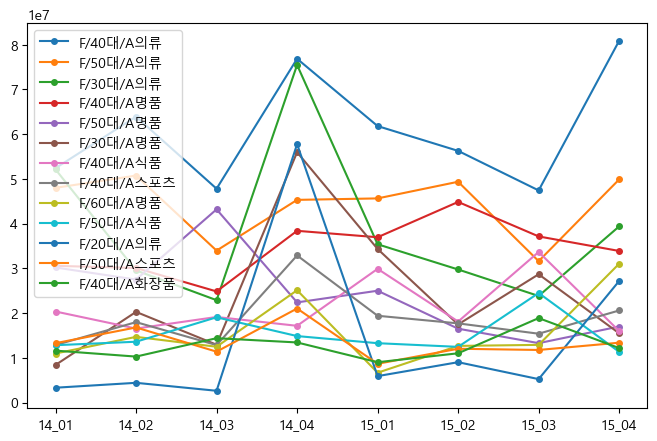

In [243]:
# A제휴사 성별 연령대별 임으코드분류별 상위 10% 그래프
topa = pd.read_excel(r'C:\Users\h\hmkd1\HMKD 프로젝트\top10A.xlsx')
topa = genage(topa)
grap(topa)

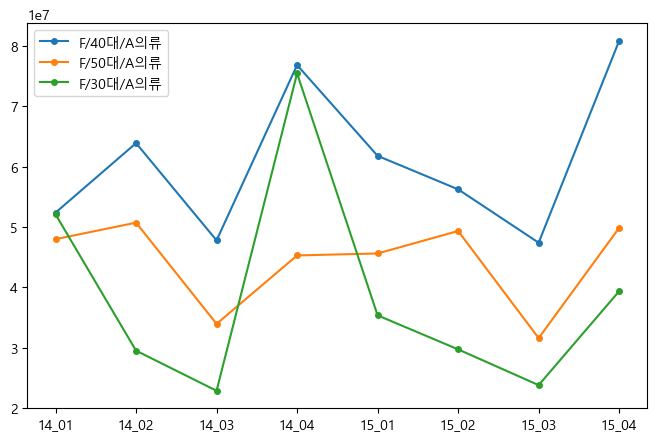

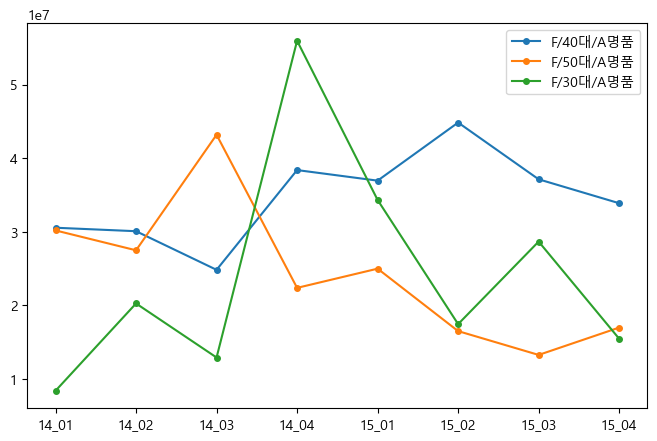

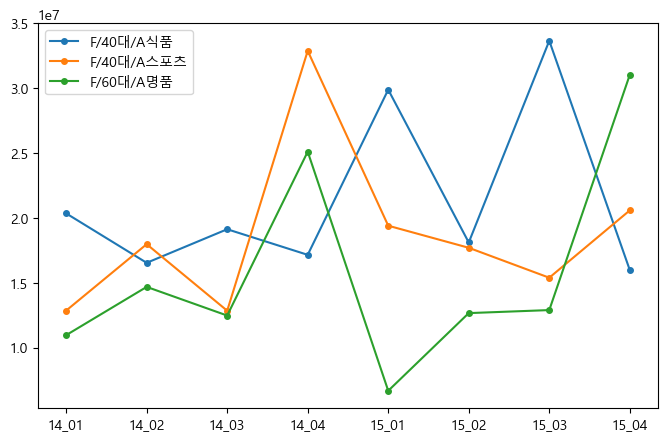

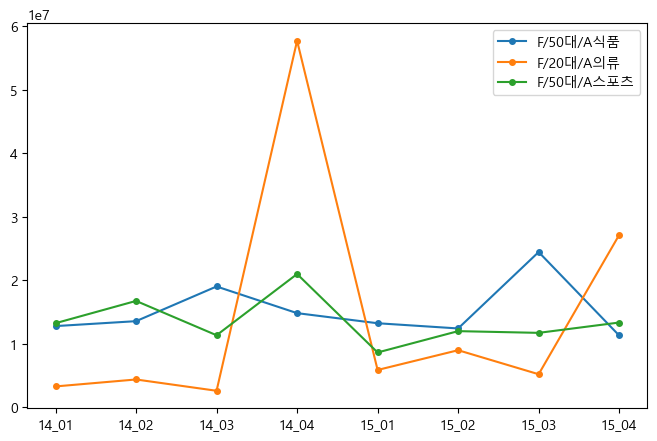

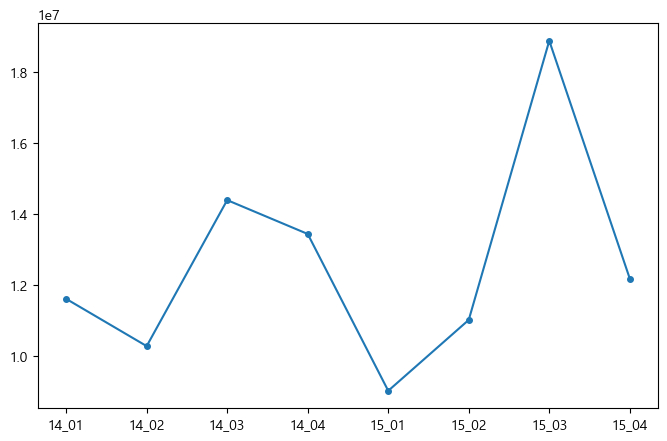

In [244]:
# A제휴사 성별 연령대별 임으코드분류별 상위 10% 그래프 (나눠서 보기)
grap_vi(topa)

In [248]:
# B제휴사 성별 연령대별 임으코드분류별 상위 10% 그래프
# topb = pd.read_excel(r'C:\Users\h\hmkd1\HMKD 프로젝트\top10A.xlsx')
# topb = genage(topb)
# grap(topb)

In [247]:
# B제휴사 성별 연령대별 임으코드분류별 상위 10% 그래프 (나눠서 보기)
# grap_vi(topb)

### 임의코드 DB업데이트

In [83]:
df.head(3)

,Unnamed: 0,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,임의코드,임의코드분류명,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,상품등급
0,0,A,4.0,402.0,A040224,A캐주얼,global SPA,A06,A의류,2938323.0,17129.0,4.0,20141018.0,17.0,53320700.0,F,25세~29세,460.0,고가
1,1,A,4.0,409.0,A040902,A디자이너,디자이너부틱,A05,A명품,3203575.0,8994.0,25.0,20141128.0,19.0,38442200.0,F,35세~39세,460.0,고가
2,2,A,2.0,203.0,A020302,A화장품,기초 화장품,A08,A화장품,2144999.0,8079.0,26.0,20140614.0,13.0,30690000.0,M,35세~39세,100.0,고가


In [149]:
df[['중분류명','임의코드']]
lista = df.임의코드.unique()
lista

array(['A06', 'A05', 'A08', 'A09', 'A00', 'A01', 'A13', 'A10', 'A02',
       'A03', 'A07', 'A11', '-', 'B10', 'B01', 'B02', 'B11', 'B00', 'B03',
       'B06', 'B09', 'B04', 'B08', 'B07', 'B16', 'B13', 'B12', 'B17',
       'B15', 'B19', 'B05', 'B18', 'B14', 'C10', 'C02', 'C01', 'C11',
       'C06', 'C08', 'C09', 'C03', 'D10', 'D08', 'D01', 'D06', 'D11',
       'D07', 'D04', 'D03', 'D09', 'D18', 'D02', 'D0'], dtype=object)

In [144]:
name=[]
for i in lista:
    print
    name.append(df.소분류코드[df.임의코드==i].unique())

In [146]:
## 임의코드 DB업데이트 할 때 쓸 거
for i,j in zip(lista, name):
    try:
        print(f"""{i}
        '{"','".join(j)}'
        """)
    except:
        pass

A06
        'A040224','A050601','A050301','A050501','A040222','A040215','A040214','A040206','A040502','A040401','A040220','A040225','A050602','A050306','A040223','A050106','A050230','A050105','A050112','A040503','A050305','A050209','A050604','A050504','A050212','A050307','A050310','A040247','A050113','A050107','A050108','A050626','A050211','A020102','A040228','A040212','A020103','A050630','A040232','A050610','A020101','A040602','A040209','A040245','A050110','A050210','A040239','A050618','A050207','A050603','A050308','A050227','A040254','A040240','A050302','A050309','A040208','A040233','A040601','A050115','A050311','A050208','A050605','A020109','A040217','A050312','A050102','A040231','A050109','A020105','A050616','A040501','A040258','A050617','A040204','A020106','A040229','A040802','A050609','A050220','A050608','A040243','A040260','A050214','A040246','A050613','A050219','A020116','A040213','A040253','A050213','A050631','A020113','A040202','A020110','A050621','A050303','A040219','A020115